In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from math import *
from numpy import sin, cos, arccos, pi, round

In [19]:
# Загрузка данных
data = pd.read_csv('Medicalpremium.csv')

# Подготовка данных
data = data[data['PremiumPrice'] > 0]

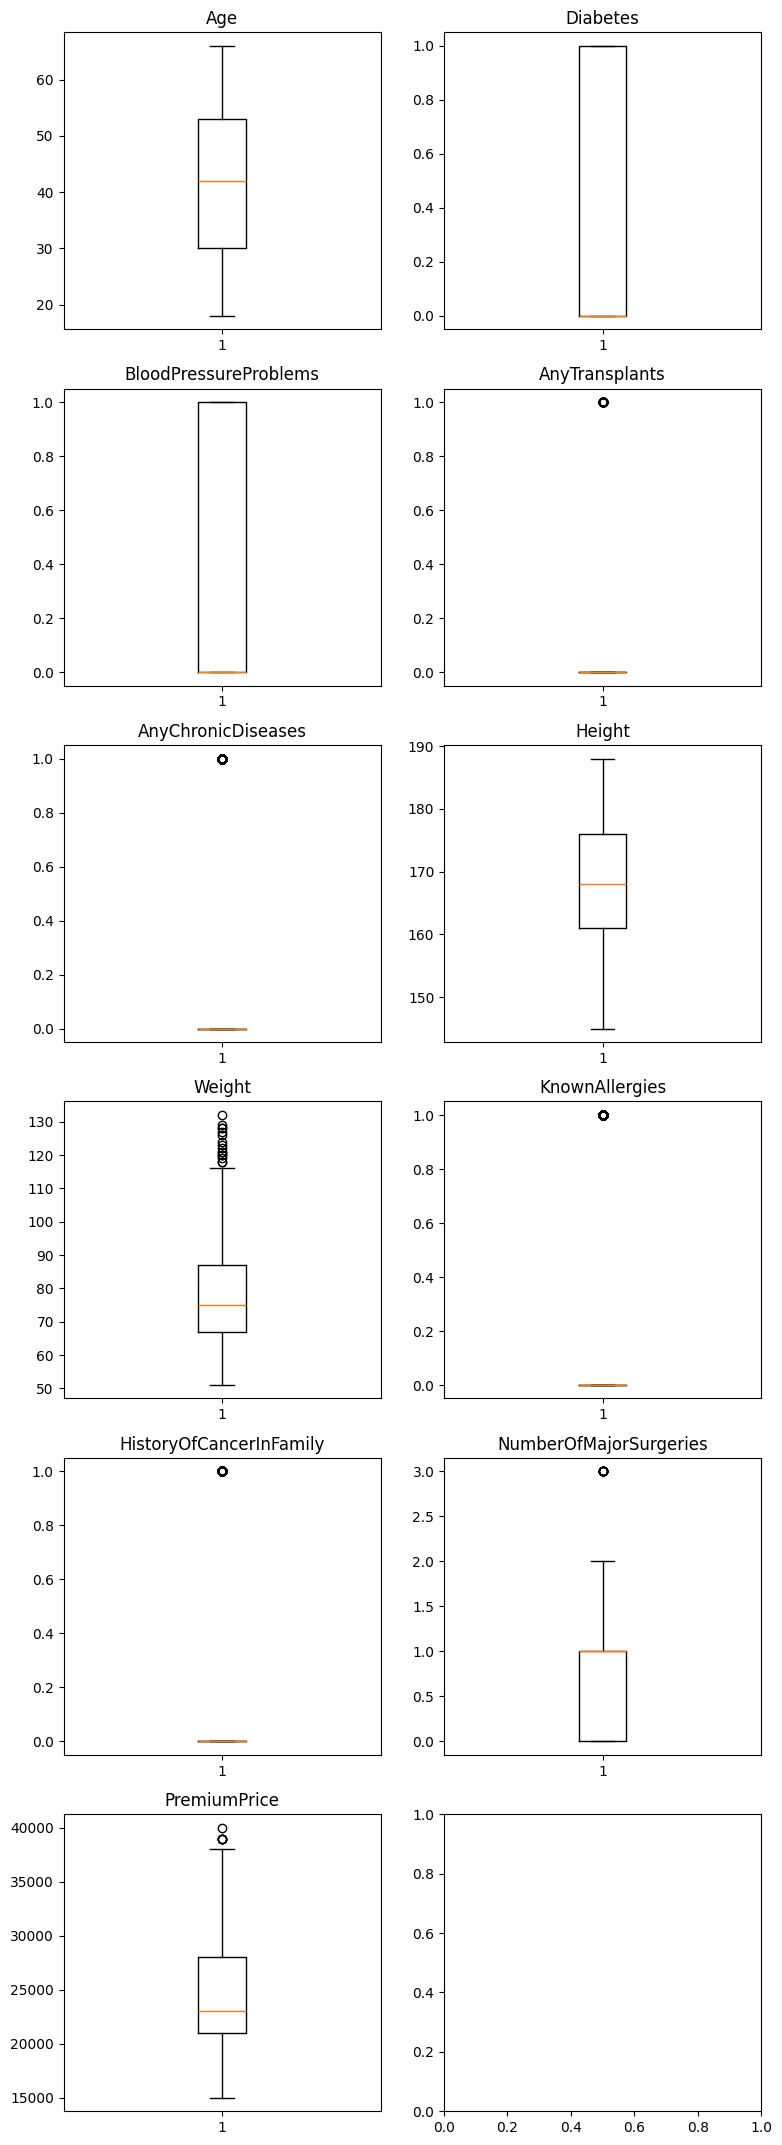

In [20]:
# Визуализация данных
countable_cols = ["Age", "Diabetes", "BloodPressureProblems", "AnyTransplants", "AnyChronicDiseases", "Height", "Weight", "KnownAllergies", "HistoryOfCancerInFamily", "NumberOfMajorSurgeries", "PremiumPrice"]
fig, axs = plt.subplots(nrows=6, ncols=2, figsize = (9,27))
for n, col in enumerate(data[countable_cols].columns):
    axs[n//2, n%2].boxplot(data[col])
    axs[n//2, n%2].set_title(col)
plt.show()

In [21]:
fig = px.imshow(data.corr())
fig.show()

<Axes: title={'center': 'Зависимость стоимости страховки от возраста'}, xlabel='Возраст', ylabel='Стоимость страховки'>

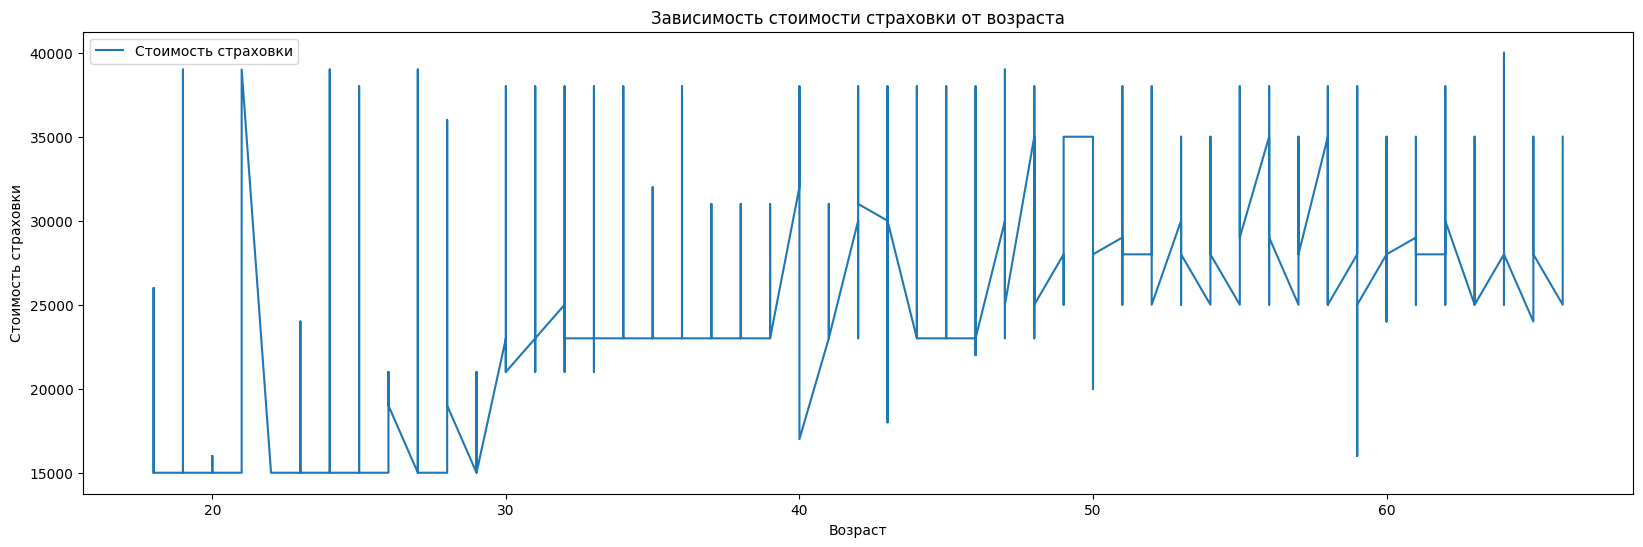

In [22]:
# График зависимости стоимости страховки от возраста
ndf = data.sort_values(by='Age')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
ndf.plot.line(x='Age', y='PremiumPrice', xlabel='Возраст', ylabel='Стоимость страховки', title='Зависимость стоимости страховки от возраста', ax=axes, label="Стоимость страховки")

**Оценка риска на основе возраста, наличия диабета и хронических заболеваний.
    В данном контексте, числа риска (RiskScore) представляют собой простую оценку здоровья человека на основе некоторых факторов. Это очень упрощенная модель и не должна использоваться для реальной медицинской диагностики. Вот что означают эти числа:**

    0: Человек не имеет ни одного из рассматриваемых факторов риска (возраст старше 50 лет, наличие диабета или хронических заболеваний). Это может указывать на относительно низкий риск здоровья, но, как уже говорилось, это очень упрощенная модель.

    1: Человек имеет один из рассматриваемых факторов риска. Это может указывать на умеренный риск.

    2: Человек имеет два из рассматриваемых факторов риска. Это может указывать на повышенный риск.

    3: Человек имеет все три рассматриваемых фактора риска. Это может указывать на высокий риск.

In [23]:
# Создаем функцию для расчета риска
def calculate_risk(row):
    risk_score = 0
    # Увеличиваем риск для людей старше 50 лет
    if row['Age'] > 50:
        risk_score += 1
    # Увеличиваем риск для людей с диабетом
    if row['Diabetes'] == 1:
        risk_score += 1
    # Увеличиваем риск для людей с хроническими заболеваниями
    if row['AnyChronicDiseases'] == 1:
        risk_score += 1
    return risk_score

# Применяем функцию к каждой строке данных
data['RiskScore'] = data.apply(calculate_risk, axis=1)
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,RiskScore
0,45,0,0,0,0,155,57,0,0,0,25000,0
1,60,1,0,0,0,180,73,0,0,0,29000,2
2,36,1,1,0,0,158,59,0,0,1,23000,1
3,52,1,1,0,1,183,93,0,0,2,28000,3
4,38,0,0,0,1,166,88,0,0,1,23000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,0
982,64,1,1,0,0,153,70,0,0,3,28000,2
983,56,0,1,0,0,155,71,0,0,1,29000,1
984,47,1,1,0,0,158,73,1,0,1,39000,1


  **Лабораторная работа включает в себя анализ и визуализацию данных о медицинской статистике. Программа успешно загрузила данные, провела предварительную обработку и создала набор диаграмм размаха для каждого из столбцов данных. Это помогло визуально оценить распределение данных в каждом столбце.**

**В заключение, работа демонстрирует эффективное использование инструментов анализа данных и машинного обучения для изучения и визуализации медицинской статистики. Однако стоит помнить, что любые выводы, сделанные на основе этого анализа, должны быть интерпретированы с осторожностью, поскольку они основаны на упрощенной модели и не учитывают многие другие важные факторы. Для более точной оценки риска следует обратиться к медицинскому специалисту.**